In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Convex hull problem (Math Section)

from an arbatery number of points, find the minumum number of points needed to construct the convex hull 

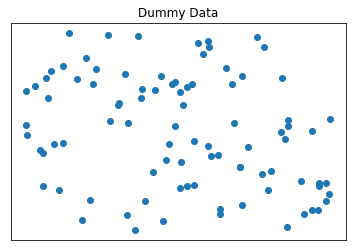

In [2]:
#set the problem
def RNG_point_gen(xLower, xUpper, yLower, yUpper, numOfPoints):
    arr = []
    for i in range(numOfPoints):
        arr.append((np.random.randint(xLower,xUpper), 
                    np.random.randint(yLower,yUpper)))
    return arr
    
arr = RNG_point_gen(-100,100, -100, 100, 90)
plt.scatter(*zip(*arr))
plt.xticks([])
plt.yticks([])
plt.title("Dummy Data")
plt.show()

# The Idea

contruct two parts, the lower and then the upper parts of the hull.

- need a function to check if point OB is counter clockwise to OA, cross product can be used
    - return val <= 0, its collinear or clock wise and not what we are looking for
    - return val > 0, its counter-clockwise
    
    
- sort points in accending order according to X value first
 - starts at the left most value
 - when reversed starts at the right most value
 
 
- start constructing lower hull find most counter clockwise coords starting at left side
 - pops values that dont give the correct hull
 
 
- reverse coord list start constructing upper hull find most counter clockwise coords starting at right side
 - pops values that dont give the correct hull
 
    

    



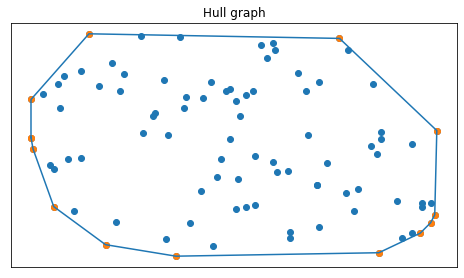

Number of points that is needed to construct this hull is 13 points 


In [3]:
def spinDirection(o, a, b):    
    return (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0]) #use cross product to find angle

def twoPartHull(coordArr):
    coordArr.sort() #sort
    
    lower = [] #lower part of HULL
    for point in coordArr:  #going from left to right
        while len(lower) >= 2 and spinDirection(lower[-2], lower[-1], point) <= 0: # is it clockwise
            lower.pop() #yes pop it and move on
        lower.append(point) #append point to be looked at 
        
    upper = []#upper part of hull
    for point in reversed(coordArr): #going from right to left 
        while len(upper) >= 2 and spinDirection(upper[-2], upper[-1], point) <= 0: # is it clockwise
            upper.pop() #yes, remove and move on
        upper.append(point) #append new point to be looked at
    
    return lower[:-1] + upper #concat both sections (starting point is counted 2 times)

            
hull = twoPartHull(arr) 

#proof that it works
plt.figure(figsize=(16/2,9/2))
plt.scatter(*zip(*arr))
plt.scatter(*zip(*hull))
plt.plot(*zip(*hull))

plt.xticks([])
plt.yticks([])
plt.title("Hull graph")
plt.show()

#hull length -1 is how many unique points
print("Number of points that is needed to construct this hull is {} points ".format(len(hull)-1)) 

# Search Challenge

Have the function `SearchingChallenge(str)` take the `str` parameter being passed and find the longest substring that contains **K** unique characters, where **K** will be the first character from the string. The substring will start from the second position in the string because the first character will be the integer **K**. For example: if `str` is "2aabbacbaa" there are several substrings that all contain 2 unique characters, namely: `["aabba", "ac", "cb", "ba"]`, but your program should return "aabba" because it is the longest substring. If there are multiple longest substrings, then return the first substring encountered with the longest length. **K** will range from 1 to 6.

In [4]:
testCases = ["2aabbacbaa", 
             "3aabacbebebe", 
             "2aabbcbbbadef",]

def SearchingChallenge(searchStr):
    number = int(searchStr[0]) #find number of unique characters
    toSearch = searchStr[1:] #the string to search
    
    savedString = [] #saved strings for later
    
    head = 0 #head to go through each character in the string
    
    while head < len(toSearch)-1: #keep going until head reaches  the end of the toSeach string
        uniqueChars = {} #used to see if a character is unique
        tempString = '' #construct string to be saved
        
        for newKey in toSearch[head:]: #check if letter is already in string
            if newKey not in uniqueChars.keys():
                if len(uniqueChars.keys()) < number: #check if there are too many
                    #no add to unique list and concat to string
                    uniqueChars[newKey] = 1
                    tempString += newKey
                    
                else:
                    #yes, do nothing just move on to next letter
                    break
            else:
                #if already there concat and increase counter on unique letter
                uniqueChars[newKey] += 1
                tempString += newKey
                
        savedString.append(tempString) #done with string, save for later
        head += 1 #increase counter by 1 
        
    #find the longest string
    max = -1
    rtn_idx = 0
    for idx, word in enumerate(savedString):
        if len(word) > max:
            max = len(word) #set new max length
            rtn_idx = idx #the index that the word can be found at
    
    return savedString[rtn_idx] #return the longest string at that saved index

for i in range(len(testCases)):
    print("Test case {}\nresult {}\n".format(testCases[i],SearchingChallenge(testCases[i])))

Test case 2aabbacbaa
result aabba

Test case 3aabacbebebe
result cbebebe

Test case 2aabbcbbbadef
result bbcbbb



# Array Challenge

Have the function `ArrayChallenge(strArr)` take `strArr` which will be an array consisting of the following elements: **N** which will be the number of gas stations in the circular route and each subsequent element will be the string **g**:**c**. where **g** is the amount of gas in the gallons at that gas station and **c** will be the amount of gallons of gas needed to get to the following gas  sation.

For example `strArr` may be: `["4","3:1","2:2","1:2","0:1"]`. Your goal is to return the index of the starting Gas sation that will allow you to travel around the whole route once, otherwise return the string **impossible**. if there are multiple gas stations, return the smallest/first index. **N** will be >= 2

In [13]:
testCases = (["4","3:1","2:2","1:2","0:1"], 
             ["4","1:1","2:2","1:2","0:1"], 
             ["4","0:1","2:2","1:2","3:1"])

def ArrayChallenge(strArr):
    numGasStations = int(strArr[0])
    stations = strArr[1:]
    
    for itr in range(0,4):
        currGas = 0
        madeIt = 0
        tempStations = stations[itr:] +  stations[:itr] #rotate through each possibility
        print("Route {}: {}".format(itr+1, tempStations))
        for station in tempStations:
            print("\tcurrGass Before Pump {}".format(currGas))
            pumpAmount, tillNext = station.split(":") #get the values
            currGas += int(pumpAmount) #add gas
            
            if(currGas - int(tillNext) < 0): #if not reachable -> move to next possiblity
                print("\tpumped {} CurrGas: {} to go {}".format(pumpAmount, currGas, tillNext))
                print("Route {} IMPOSSIBLE\n".format(itr+1))
                break
            else: # is it possible
                madeIt += 1
                print("\tpumped {} CurrGas: {} to go {}\n".format(pumpAmount, currGas, tillNext))
                currGas -= int(tillNext)
        
        if(madeIt == numGasStations):
            return itr + 1 #return the route -> +1 cuz too initial index out
    
    return "impossible"

for idx, test in enumerate(testCases):
    print("/////////////test Case {} /////////////".format(idx))
    val = ArrayChallenge(test)
    
    if val == "impossible": 
        print("NO ROUTE FOUND\n")
    else:
        print("Route {} POSSIBLE\n".format(val))
    print("///////////// FINISHED /////////////\n\n")

/////////////test Case 0 /////////////
Route 1: ['3:1', '2:2', '1:2', '0:1']
	currGass Before Pump 0
	pumped 3 CurrGas: 3 to go 1

	currGass Before Pump 2
	pumped 2 CurrGas: 4 to go 2

	currGass Before Pump 2
	pumped 1 CurrGas: 3 to go 2

	currGass Before Pump 1
	pumped 0 CurrGas: 1 to go 1

Route 1 POSSIBLE

///////////// FINISHED /////////////


/////////////test Case 1 /////////////
Route 1: ['1:1', '2:2', '1:2', '0:1']
	currGass Before Pump 0
	pumped 1 CurrGas: 1 to go 1

	currGass Before Pump 0
	pumped 2 CurrGas: 2 to go 2

	currGass Before Pump 0
	pumped 1 CurrGas: 1 to go 2
Route 1 IMPOSSIBLE

Route 2: ['2:2', '1:2', '0:1', '1:1']
	currGass Before Pump 0
	pumped 2 CurrGas: 2 to go 2

	currGass Before Pump 0
	pumped 1 CurrGas: 1 to go 2
Route 2 IMPOSSIBLE

Route 3: ['1:2', '0:1', '1:1', '2:2']
	currGass Before Pump 0
	pumped 1 CurrGas: 1 to go 2
Route 3 IMPOSSIBLE

Route 4: ['0:1', '1:1', '2:2', '1:2']
	currGass Before Pump 0
	pumped 0 CurrGas: 0 to go 1
Route 4 IMPOSSIBLE

NO RO